In [1]:
from functions import *
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import shap
from collections import Counter

## Data Preprocessing

In [2]:
path_1 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/THL1.csv"
path_2 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/THL2.csv"
path_3 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/THL3.csv"

THL_1 = pd.read_csv(path_1, sep=';')
THL_1.drop(columns=['Unnamed: 0'], inplace=True)
THL_2 = pd.read_csv(path_2, sep=';')
THL_2.drop(columns=['Unnamed: 0'], inplace=True)
THL_3 = pd.read_csv(path_3, sep=',')


In [3]:
## set modules
module1 = ['M01_1_N', 'M02_1_N', 'M03_1_N', 'M04_1_N', 'M05_1_N', 'M06_1_N']

module2 = [
            'M01_2_N', 'M02_2_N', 'M03_2_N', 'M04_2_N', 'M05_2_N', 'M06_2_N',
            'M07_2_N', 'M08_2_N', 'M09_2_N', 'M10_2_N', 'M11_2_N', 'M12_2_N',]

module3 = ['M01_3_N', 'M02_3_N', 'M03_3_N', 'M04_3_N', 'M05_3_N', 'M06_3_N',
            'M07_3_N', 'M08_3_N', 'M09_3_N', 'M10_3_N', 'M11_3_N', 'M12_3_N',
            'M13_3_N', 'M14_3_N', 'M15_3_N', 'M16_3_N', 'M17_3_N']

### Train test split function

### Search Space / Param Grid 

In [4]:
from hyperopt import *
search_space = {
    'fit_intercept': hp.choice('fit_intercept', [True]),
    'solver': hp.choice('solver', ['liblinear', 'lbfgs']),
    'C': hp.uniform('C', 0.018, 0.03),
    'penalty': hp.choice('penalty', ['l2']),
    'class_weight':'balanced',
}

## THL semester 1

In [5]:
# Count occurrences of each unique value in the 'status' column
counter_1 = Counter(THL_1['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_1[1]} | 0: {counter_1[0]}')
hpo = ModelTrainer(random_state=42)
x, y = hpo.split_data(THL_1, module1)

Quantity of Drop Out and Degree in THL-1: 
 1: 423 | 0: 54


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 38.63trial/s, best loss: -0.8433140669203004]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            05               06
	 actual 1            08               77

Model parameters:
{'C': 0.02545035196935045, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Balanced acc.: 68.02139%
Validation accuracy.: 85.41667%
Sensitivity score (for 1): 90.58824%
Specificity score (for 0): 45.45455%
F1 score.: 91.66667%
False prediction: 14.58333%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 41.12trial/s, best loss: -0.804098

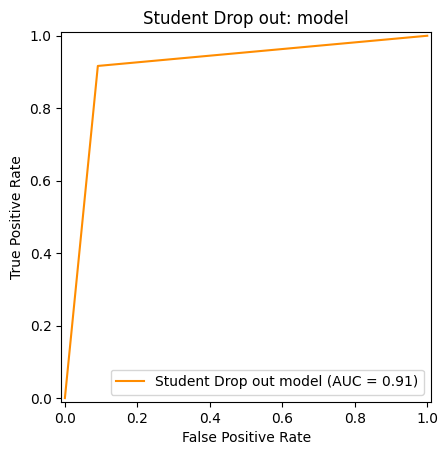

In [6]:
models_1, feature_importance = hpo.cross_validation_hpo(
    x=x, y=y,
    search_space=search_space, 
    folds=5,
    algo='lr'
    )

In [7]:
feature_importance

,variable,coefficient
1,M02_1_N,0.354710
3,M04_1_N,0.330960
0,M01_1_N,0.306840
4,M05_1_N,0.240150
2,M03_1_N,0.198520
5,M06_1_N,0.144820


#### Shap analysis

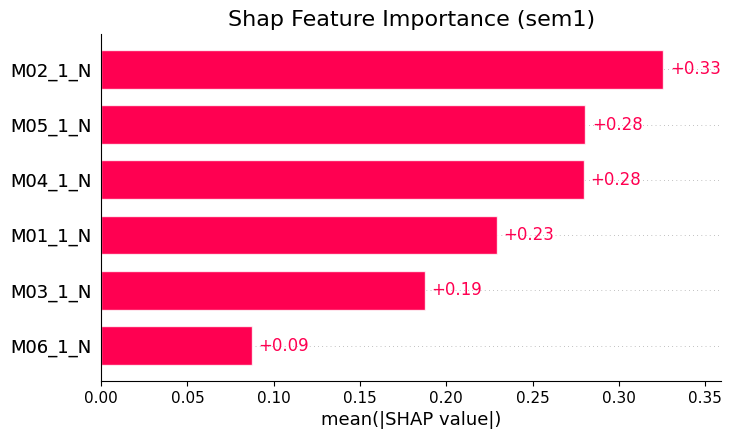

In [8]:
## Shap Global explainations
import shap
explainer = shap.Explainer(models_1['model'], models_1['x_train'])
shap_values = explainer(models_1['x_test'])

plt.title('Shap Feature Importance (sem1)', fontsize=16)
shap.plots.bar(shap_values)

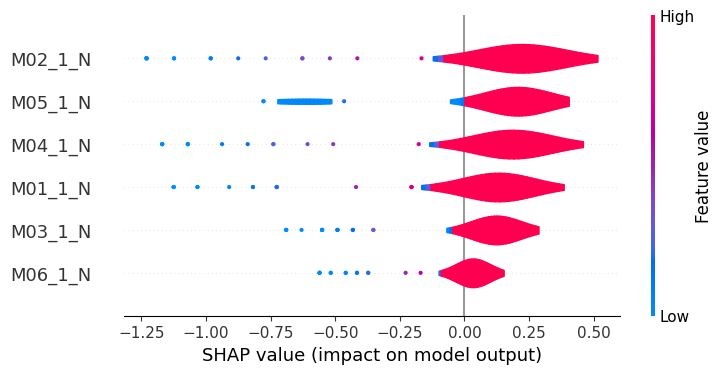

In [9]:
shap.plots.violin(shap_values, show=True)

In [10]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values, link='logit')

In [11]:
hpo.plot_shap_force(model=models_1, 
           shap_values=shap_values, 
           student_index=29)

Student index 29 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.180, Probability [1]: 0.820


In [12]:
hpo.plot_shap_force(model=models_1, 
           shap_values=shap_values, 
           student_index=11)

Student index 11 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.180, Probability [1]: 0.820


In [13]:
hpo.plot_shap_force(model=models_1, 
           shap_values=shap_values, 
           student_index=39)

Student index 39 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.180, Probability [1]: 0.820


In [14]:
hpo.plot_shap_force(model=models_1, 
           shap_values=shap_values, 
           student_index=46)

Student index 46 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.180, Probability [1]: 0.820


## THL semester 2 

In [35]:
# Count occurrences of each unique value in the 'status' column
counter_2 = Counter(THL_2['status'])
print(f'Quantity of Drop Out and Degree in THL-2: \n 1: {counter_2[1]} | 0: {counter_2[0]}')
hpo2 = ModelTrainer(random_state=72)
x, y = hpo2.split_data(THL_2, module2)


Quantity of Drop Out and Degree in THL-2: 
 1: 256 | 0: 54


------------------------------------- Fold 1 --------------------------------------------------
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 10/10 [00:00<00:00, 34.67trial/s, best loss: -0.8298577235772358]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            07               03
	 actual 1            09               43

Model parameters:
{'C': 0.025128919174160328, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Balanced acc.: 76.34615%
Validation accuracy.: 80.64516%
Sensitivity score (for 1): 82.69231%
Specificity score (for 0): 70.00000%
F1 score.: 87.75510%
False prediction: 19.35484%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 48.90trial/s, best loss: -0.820189701897019]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0          

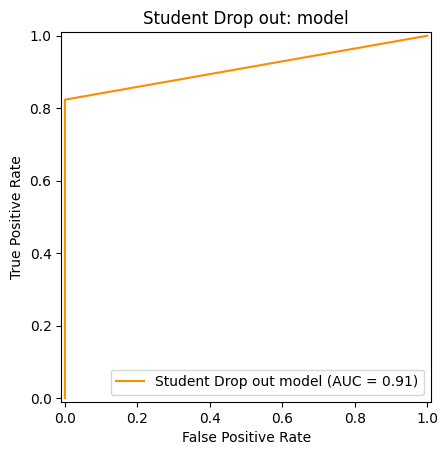

In [36]:
models_2, feature_importance2 = hpo2.cross_validation_hpo(
    x=x, y=y,
    search_space=search_space, 
    folds=5,
    algo='lr'
    )

In [17]:
feature_importance2

,variable,coefficient
1,M02_2_N,0.285430
8,M09_2_N,0.265950
10,M11_2_N,0.214780
6,M07_2_N,0.213820
5,M06_2_N,0.183180
7,M08_2_N,0.179410
4,M05_2_N,0.150910
0,M01_2_N,0.147790
9,M10_2_N,0.096040
2,M03_2_N,0.093330


#### Shap analysis

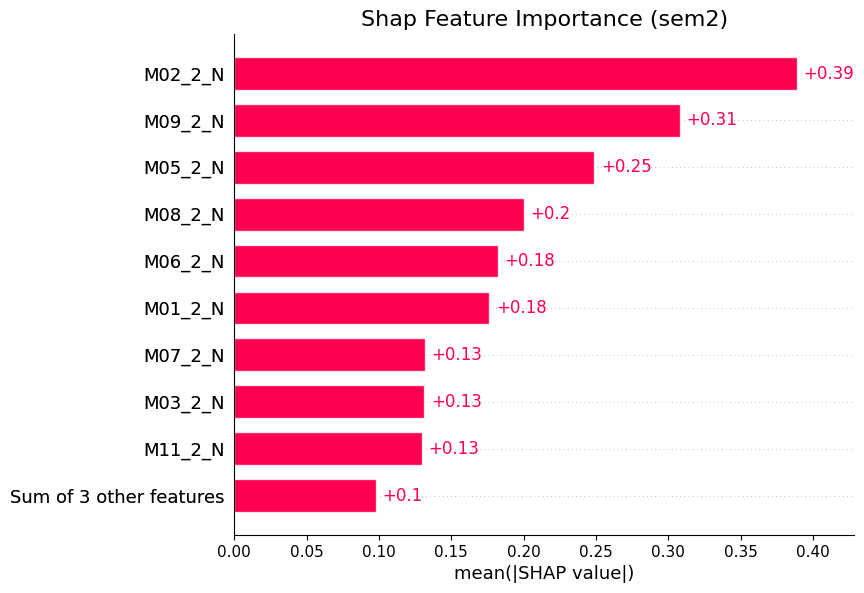

In [18]:
## Shap Global explainations
import shap
explainer2 = shap.Explainer(models_2['model'], models_2['x_train'])
shap_values2 = explainer2(models_2['x_test'])

plt.title('Shap Feature Importance (sem2)', fontsize=16)
shap.plots.bar(shap_values2)

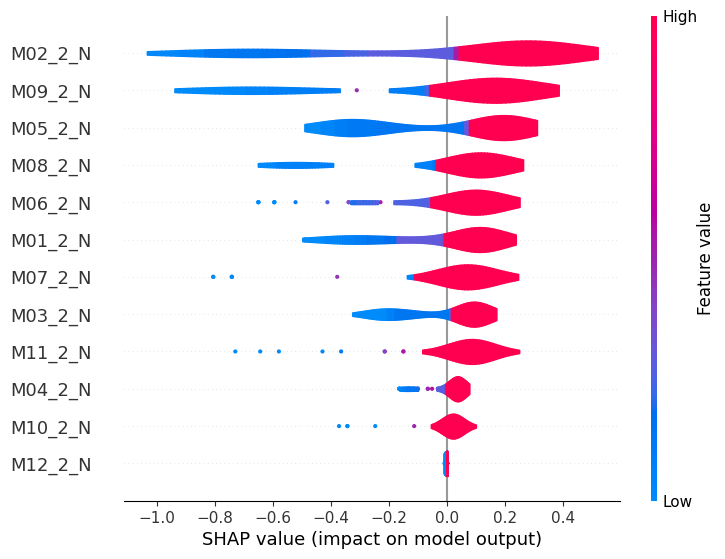

In [19]:
shap.plots.violin(shap_values2, show=True)

In [20]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values2, link='logit')

In [21]:
hpo2.plot_shap_force(model=models_2, 
           shap_values=shap_values2, 
           student_index=20, link='logit')

Student index 20 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.112, Probability [1]: 0.888


In [22]:
hpo2.plot_shap_force(model=models_2, 
           shap_values=shap_values2, 
           student_index=5)

Student index 5 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.112, Probability [1]: 0.888


In [23]:
hpo2.plot_shap_force(model=models_2, 
           shap_values=shap_values2, 
           student_index=6)

Student index 6 grades:
         grades
M01_2_N     2.3
M02_2_N     4.0
M03_2_N     1.7
M04_2_N     1.0
M05_2_N     2.0
M06_2_N     2.7
M07_2_N     5.1
M08_2_N     1.7
M09_2_N     2.3
M10_2_N     5.0
M11_2_N     1.3
M12_2_N     5.1
Status: 1, Prediction: [0], Probability [0]: 0.906, Probability [1]: 0.094


In [24]:
hpo2.plot_shap_force(model=models_2, 
           shap_values=shap_values2, 
           student_index=10)

Student index 10 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.112, Probability [1]: 0.888


## THL semester 3

In [25]:
# Count occurrences of each unique value in the 'status' column
counter_3 = Counter(THL_3['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_3[1]} | 0: {counter_3[0]}')
hpo3 = ModelTrainer(random_state=42)
x, y = hpo3.split_data(THL_3, module3)

Quantity of Drop Out and Degree in THL-1: 
 1: 168 | 0: 54


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 24.85trial/s, best loss: -0.8546652421652421]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            07               04
	 actual 1            07               27

Model parameters:
{'C': 0.029326903114133815, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Balanced acc.: 71.52406%
Validation accuracy.: 75.55556%
Sensitivity score (for 1): 79.41176%
Specificity score (for 0): 63.63636%
F1 score.: 83.07692%
False prediction: 24.44444%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 22.99trial/s, best loss: -0.85188

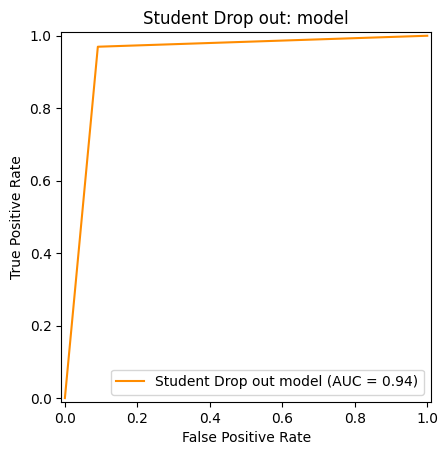

In [26]:
models_3, feature_importance3 = hpo3.cross_validation_hpo(
    x=x, y=y,
    search_space=search_space, 
    folds=5,
    algo='lr'
    )

In [27]:
feature_importance3

,variable,coefficient
15,M16_3_N,0.259170
1,M02_3_N,0.241390
9,M10_3_N,0.181790
4,M05_3_N,0.153450
8,M09_3_N,0.140360
0,M01_3_N,0.114780
6,M07_3_N,0.101570
5,M06_3_N,0.093010
12,M13_3_N,0.088290
7,M08_3_N,0.081750


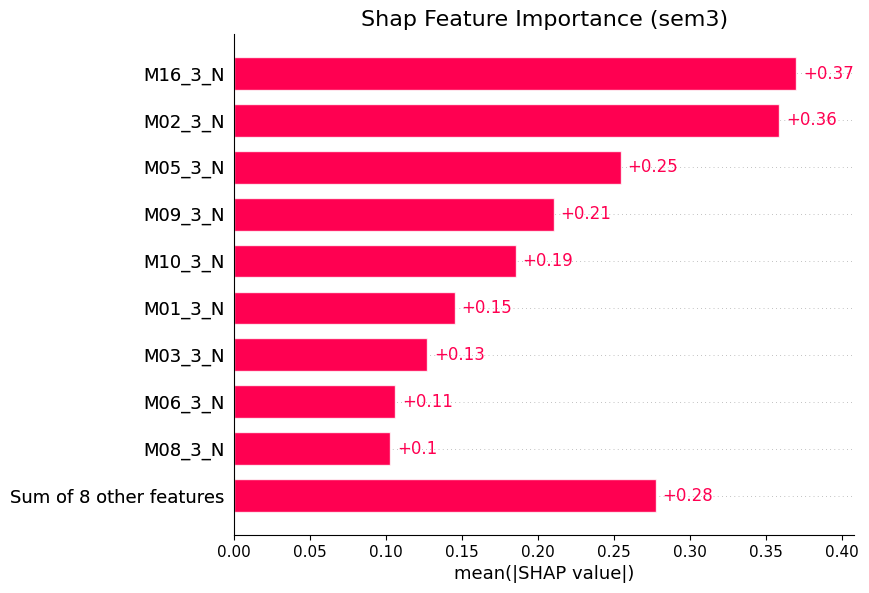

In [28]:
## Shap Global explainations
import shap
explainer3 = shap.Explainer(models_3['model'], models_3['x_train'])
shap_values3 = explainer3(models_3['x_test'])

plt.title('Shap Feature Importance (sem3)', fontsize=16)
shap.plots.bar(shap_values3)

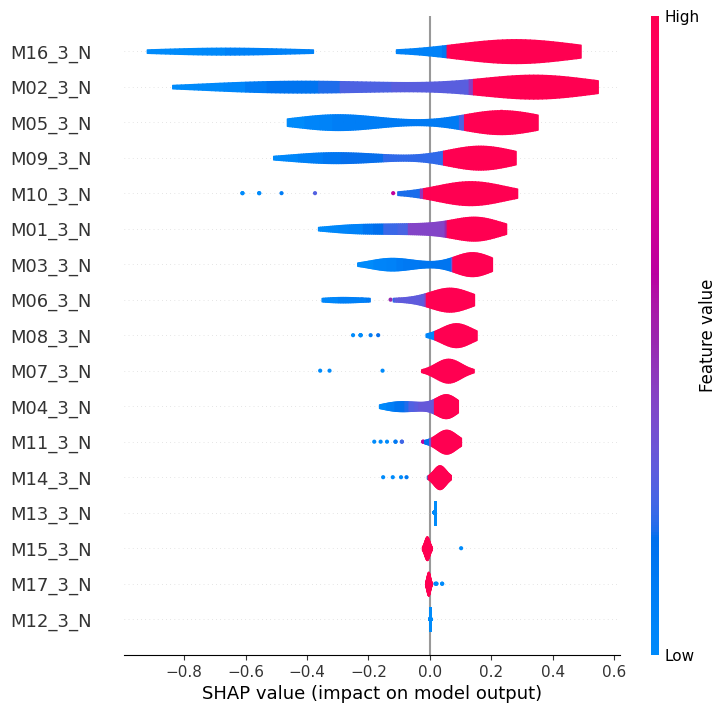

In [29]:
shap.plots.violin(shap_values3, show=True)

In [30]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values3, link='logit')

In [31]:
hpo3.plot_shap_force(model=models_3, 
           shap_values=shap_values3, 
           student_index=1)

Student index 1 grades:
         grades
M01_3_N     2.7
M02_3_N     4.0
M03_3_N     1.7
M04_3_N     2.0
M05_3_N     5.1
M06_3_N     3.3
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     1.7
M10_3_N     3.7
M11_3_N     5.0
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     1.7
M17_3_N     5.1
Status: 1, Prediction: [0], Probability [0]: 0.594, Probability [1]: 0.406


In [32]:
hpo3.plot_shap_force(model=models_3, 
           shap_values=shap_values3, 
           student_index=9)

Student index 9 grades:
         grades
M01_3_N     2.3
M02_3_N     1.0
M03_3_N     1.7
M04_3_N     2.0
M05_3_N     1.7
M06_3_N     1.3
M07_3_N     1.0
M08_3_N     1.3
M09_3_N     1.7
M10_3_N     2.3
M11_3_N     4.0
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     1.0
M15_3_N     5.1
M16_3_N     1.3
M17_3_N     1.0
Status: 0, Prediction: [0], Probability [0]: 0.959, Probability [1]: 0.041


In [33]:
hpo3.plot_shap_force(model=models_3, 
           shap_values=shap_values3, 
           student_index=3)

Student index 3 grades:
         grades
M01_3_N     5.1
M02_3_N     5.1
M03_3_N     5.1
M04_3_N     5.1
M05_3_N     2.3
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.128, Probability [1]: 0.872


In [34]:
hpo3.plot_shap_force(model=models_3, 
           shap_values=shap_values3, 
           student_index=10)

Student index 10 grades:
         grades
M01_3_N     5.1
M02_3_N     5.1
M03_3_N     5.1
M04_3_N     5.1
M05_3_N     5.1
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.087, Probability [1]: 0.913
